# Analysis Notebook
- Here we load the pickle files of both runs and analyze them

In [165]:
import pickle
import os
import matplotlib.pyplot as plt

def load_pickle_objects():
    first_run_dir = "./pickle_objects"
    second_run_dir = "./pickle_objects_2"

    # Prepare run lists
    sinus_ratios_sorted_1 = [[],[],[]]
    radial_ratios_sorted_1 = [[],[],[]]
    meandering_ratios_sorted_1 = [[],[],[]]

    sinus_ratios_sorted_2 = [[],[],[]]
    radial_ratios_sorted_2 = [[],[],[]]
    meandering_ratios_sorted_2 = [[],[],[]]

    for file in os.listdir(first_run_dir):
        with open(f"{first_run_dir}/{file}", "rb") as f:
            if file.startswith("0"):
                if file.find("0_3") != -1:
                    sinus_ratios_sorted_1[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    sinus_ratios_sorted_1[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    sinus_ratios_sorted_1[2].append(pickle.load(f))
            elif file.startswith("2"):
                if file.find("0_3") != -1:
                    radial_ratios_sorted_1[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    radial_ratios_sorted_1[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    radial_ratios_sorted_1[2].append(pickle.load(f))
            else:
                if file.find("0_3") != -1:
                    meandering_ratios_sorted_1[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    meandering_ratios_sorted_1[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    meandering_ratios_sorted_1[2].append(pickle.load(f))
    for file in os.listdir(second_run_dir):
        with open(f"{second_run_dir}/{file}", "rb") as f:
            if file.startswith("0"):
                if file.find("0_3") != -1:
                    sinus_ratios_sorted_2[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    sinus_ratios_sorted_2[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    sinus_ratios_sorted_2[2].append(pickle.load(f))
            elif file.startswith("2"):
                if file.find("0_3") != -1:
                    radial_ratios_sorted_2[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    radial_ratios_sorted_2[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    radial_ratios_sorted_2[2].append(pickle.load(f))
            else:
                if file.find("0_3") != -1:
                    meandering_ratios_sorted_2[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    meandering_ratios_sorted_2[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    meandering_ratios_sorted_2[2].append(pickle.load(f))

    for i in range(len(sinus_ratios_sorted_1)):
        print(f"Length sinus ratio list 1: {len(sinus_ratios_sorted_1[i])}")
        print(f"Length radial ratio list 1: {len(radial_ratios_sorted_1[i])}")
        print(f"Length meandering ratio list 1: {len(meandering_ratios_sorted_1[i])}")
        print(f"Length sinus ratio list 2: {len(sinus_ratios_sorted_2[i])}")
        print(f"Length radial ratio list 2: {len(radial_ratios_sorted_2[i])}")
        print(f"Length meandering ratio list 2: {len(meandering_ratios_sorted_2[i])}")
    
    # Make run pairs:
    sin_sorted_both = (sinus_ratios_sorted_1, sinus_ratios_sorted_2)
    radial_sorted_both = (radial_ratios_sorted_1, radial_ratios_sorted_2)
    meandering_sorted_both = (meandering_ratios_sorted_1, meandering_ratios_sorted_2)

    # Make return tuple of all 3
    return (sin_sorted_both, radial_sorted_both, meandering_sorted_both)
    

## Pareto Dominanz Funktion

In [166]:
def pareto_from_lists(weights, steps, paths):
    """
    Berechnet die Pareto-Front aus zwei korrespondierenden Listen.
    Beide Ziele werden minimiert.

    :param weights: Liste der Shifted_Weight-Werte
    :param steps: Liste der Steps-Werte
    :return: (pareto_weights, pareto_steps)
    """
    if len(weights) != len(steps):
        raise ValueError("weights und steps müssen gleich lang sein")

    # Zusammenführen (weight, steps)
    points = list(zip(weights, steps, paths))

    # Sortieren nach Gewicht, dann Steps
    points.sort(key=lambda x: (x[0], x[1]))

    pareto = []
    best_steps = float("inf")

    for w, s, p in points:
        if s < best_steps:
            pareto.append((w, s, p))
            best_steps = s

    # Wieder trennen in zwei Listen
    pareto_weights = [w for w, _, _ in pareto]
    pareto_steps = [s for _, s, _ in pareto]
    pareto_pahts = [p for _, _, p in pareto]

    return pareto_weights, pareto_steps, pareto_pahts

## Sort per ratio

Length sinus ratio list 1: 31
Length radial ratio list 1: 31
Length meandering ratio list 1: 31
Length sinus ratio list 2: 31
Length radial ratio list 2: 31
Length meandering ratio list 2: 31
Length sinus ratio list 1: 31
Length radial ratio list 1: 31
Length meandering ratio list 1: 31
Length sinus ratio list 2: 31
Length radial ratio list 2: 31
Length meandering ratio list 2: 31
Length sinus ratio list 1: 31
Length radial ratio list 1: 31
Length meandering ratio list 1: 31
Length sinus ratio list 2: 31
Length radial ratio list 2: 31
Length meandering ratio list 2: 31
Steps: 7
Weights: 7


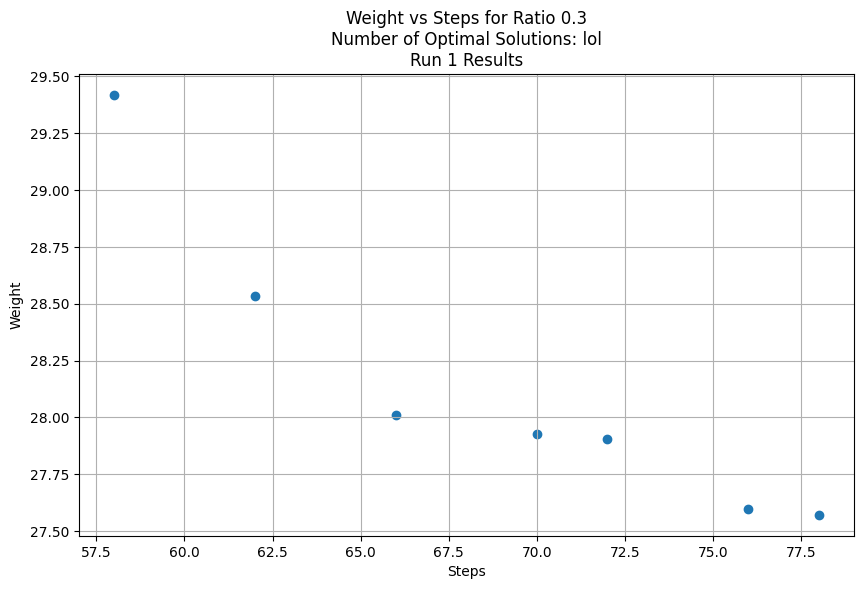

Steps: 2
Weights: 2


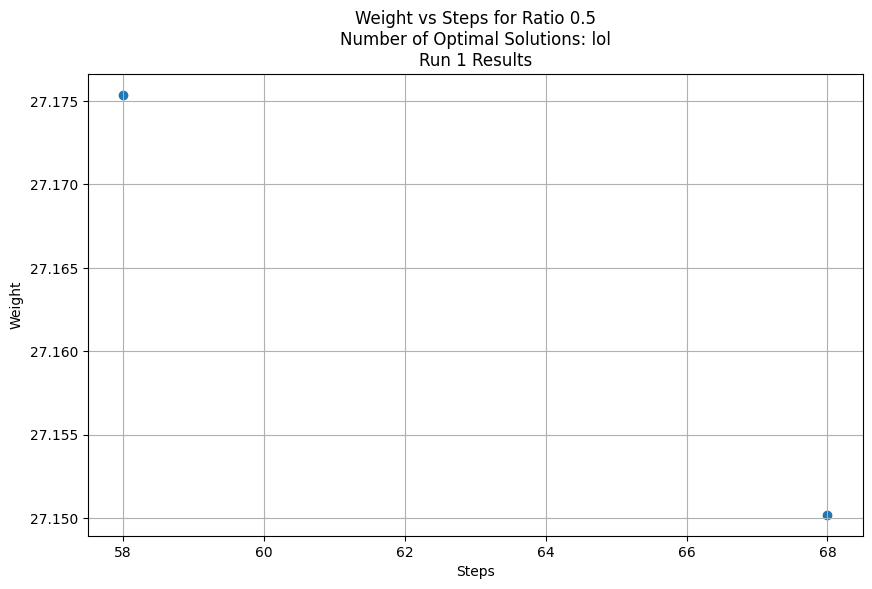

Steps: 2
Weights: 2


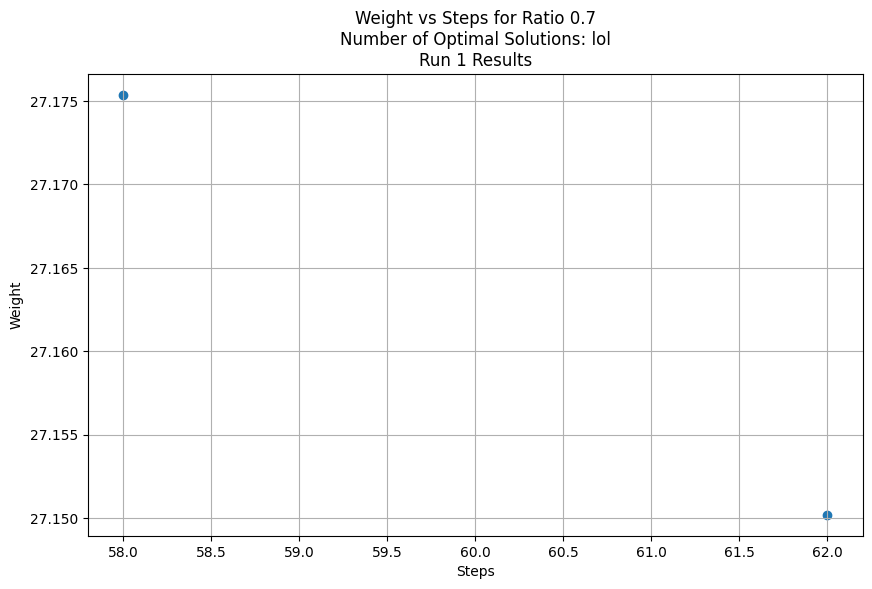

In [167]:
ratios = [0.3, 0.5, 0.7]
sin_sorted_both, radial_sorted_both, meandering_sorted_both = load_pickle_objects()
for i, ratio in enumerate(sin_sorted_both[0]):
    weights = []
    steps = []
    paths = []
    for run in ratio:
        weights += list(run["Shifted_Weight"])
        steps += list(run["Steps"])
        paths += list(run["Paths"])

    pareto_weights, pareto_steps, pareto_paths = pareto_from_lists(weights, steps, paths)  
    print(f"Steps: {len(pareto_steps)}")
    print(f"Weights: {len(pareto_weights)}")
    plt.figure(figsize=(10, 6))
    plt.scatter(pareto_steps, pareto_weights, marker='o')   # Line plot with markers 
    plt.xlabel("Steps")
    plt.ylabel("Weight")
    plt.title(f"Weight vs Steps for Ratio {ratios[i]}\nNumber of Optimal Solutions: lol\nRun 1 Results")
    plt.grid(True)

    plt.show()



## Generate Maps of Final Paths

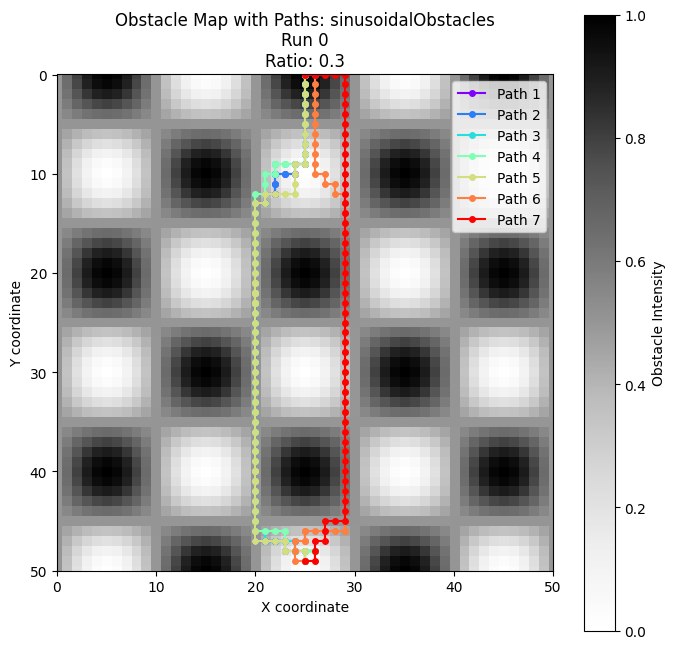

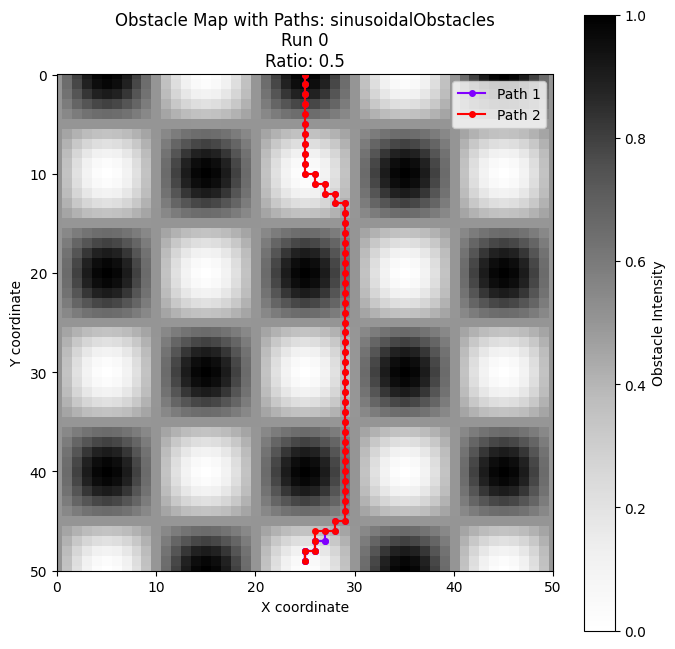

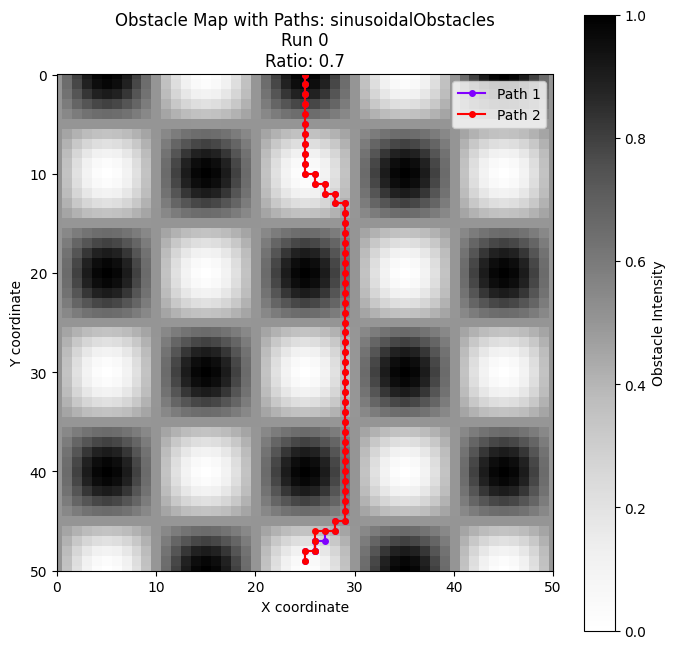

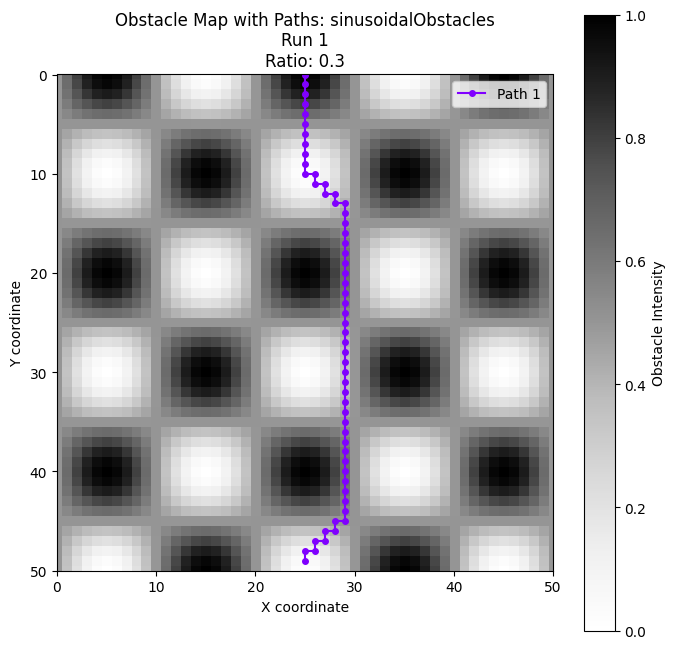

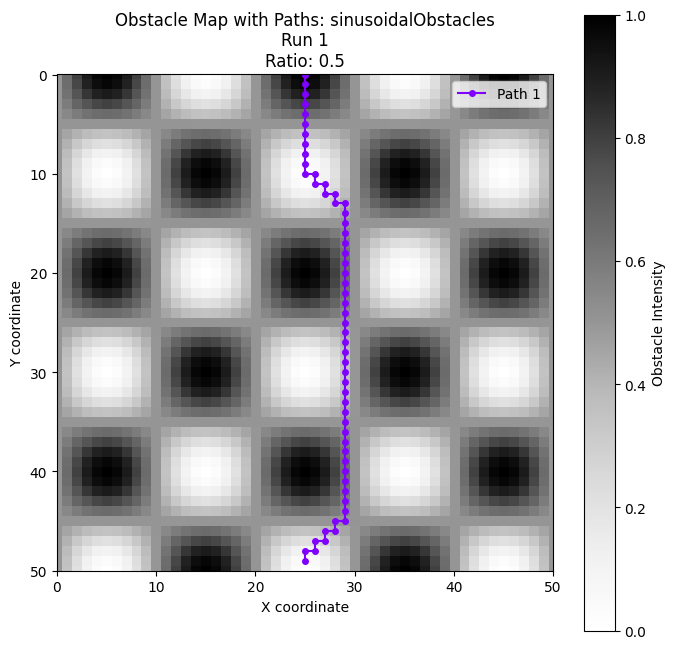

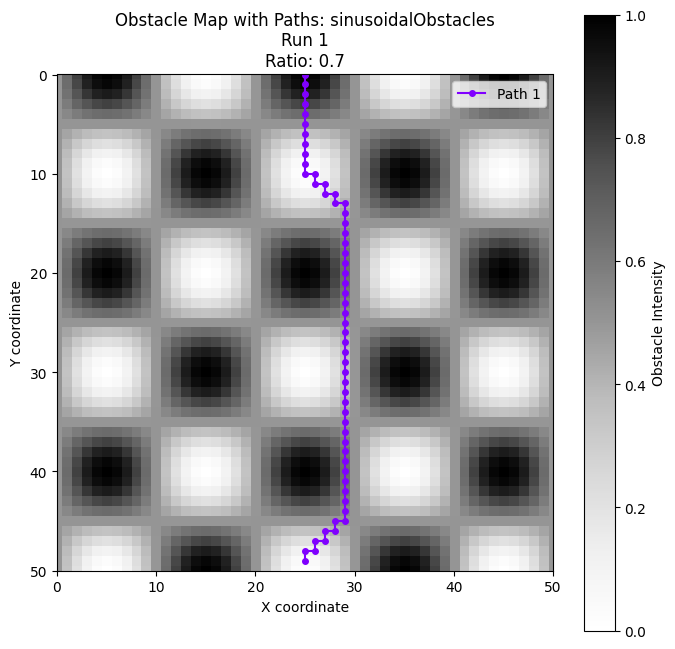

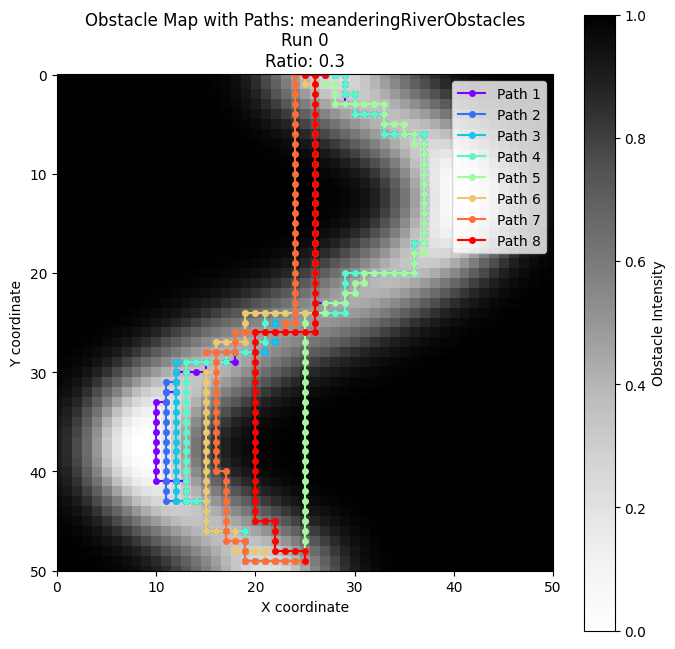

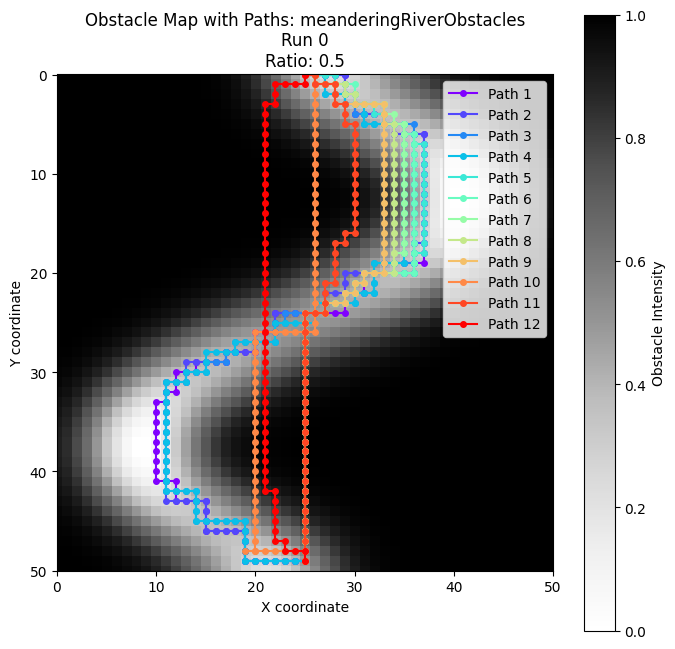

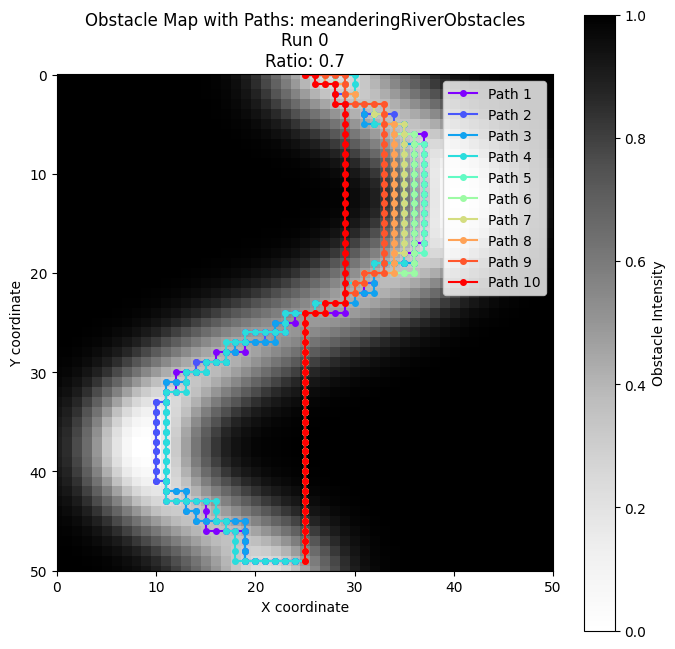

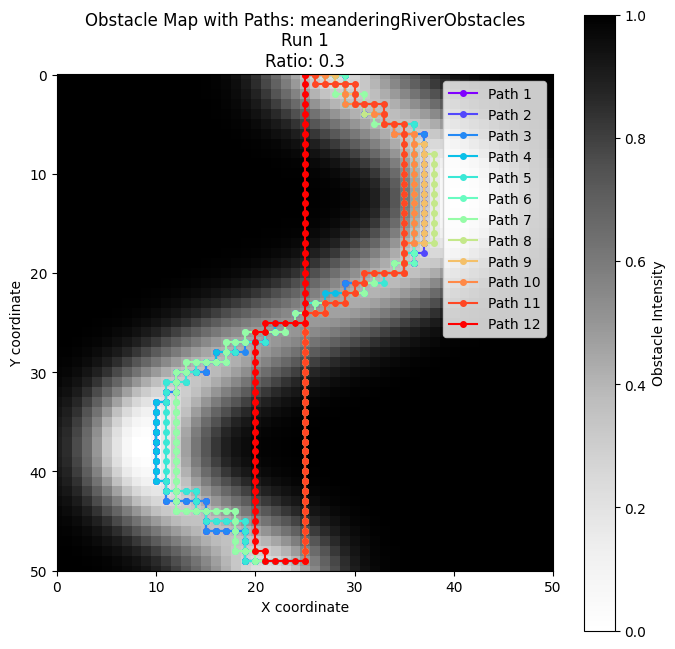

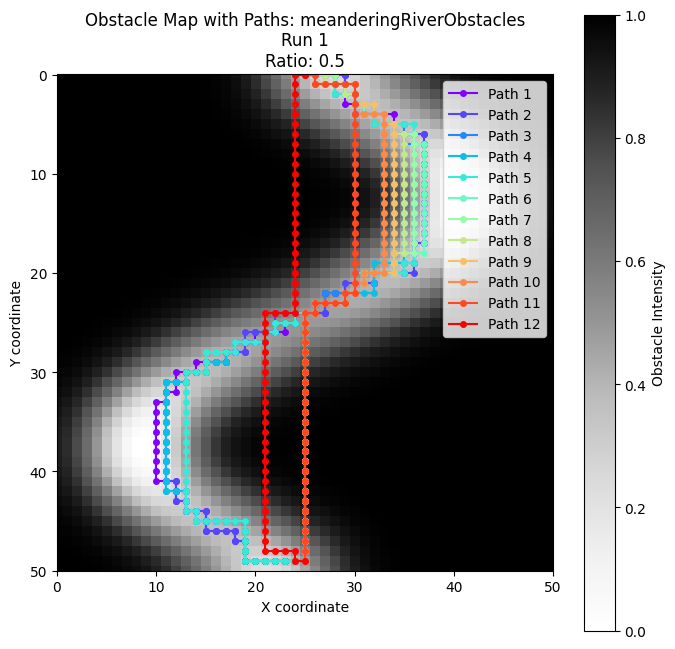

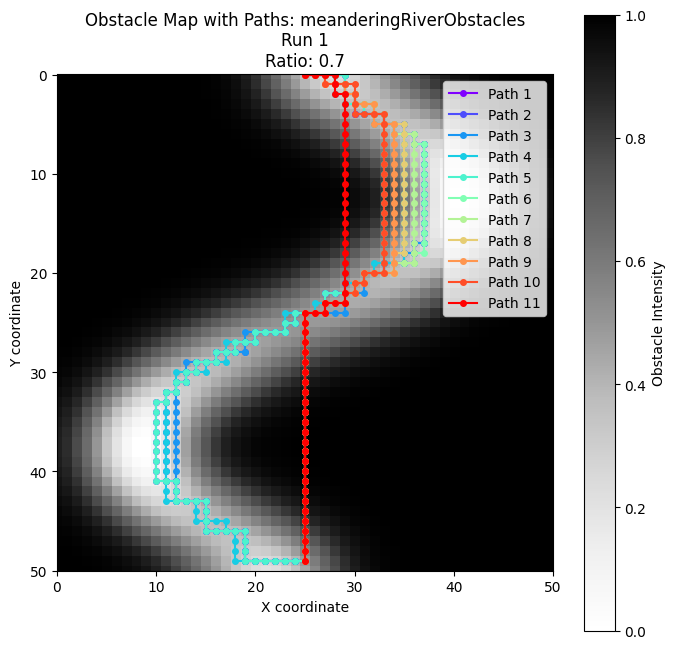

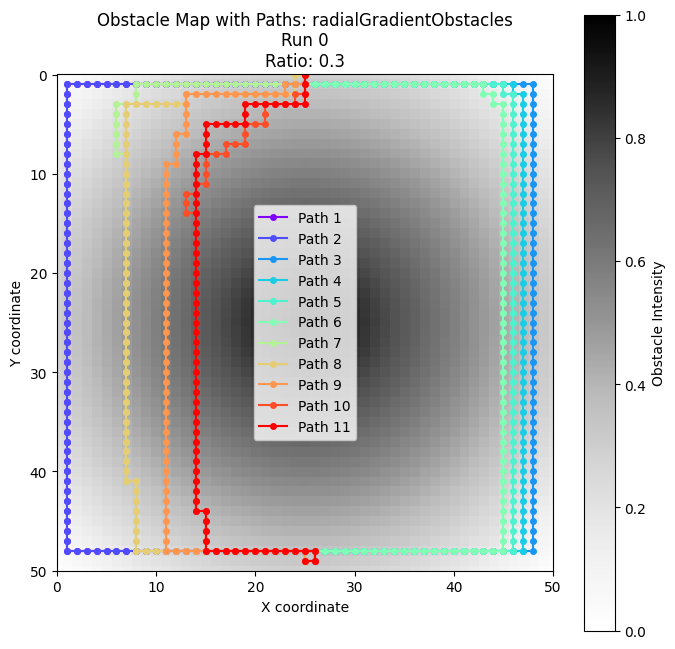

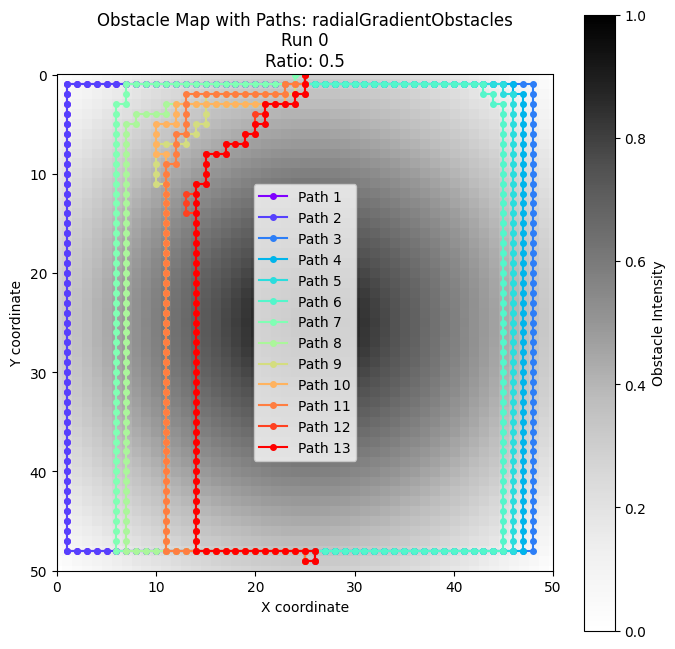

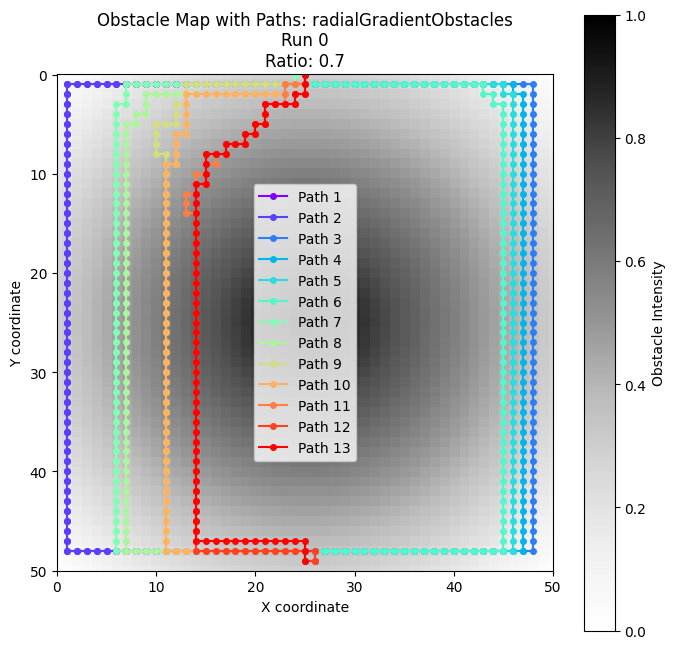

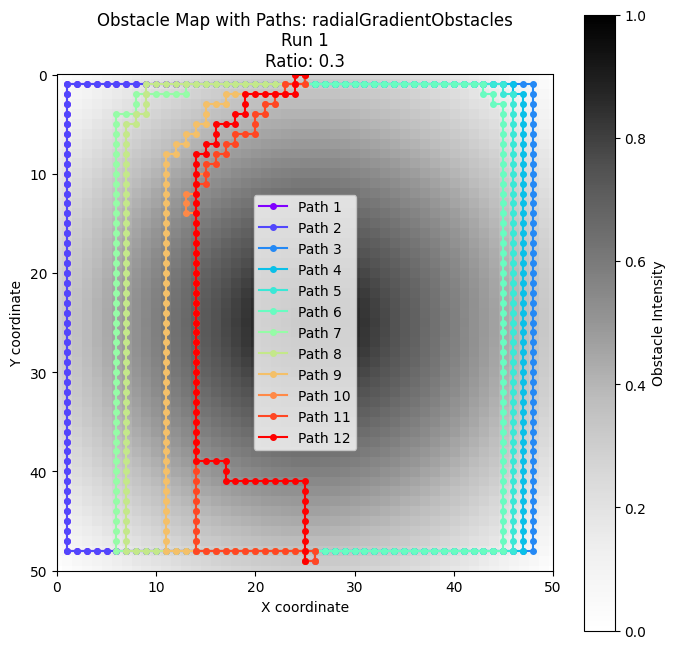

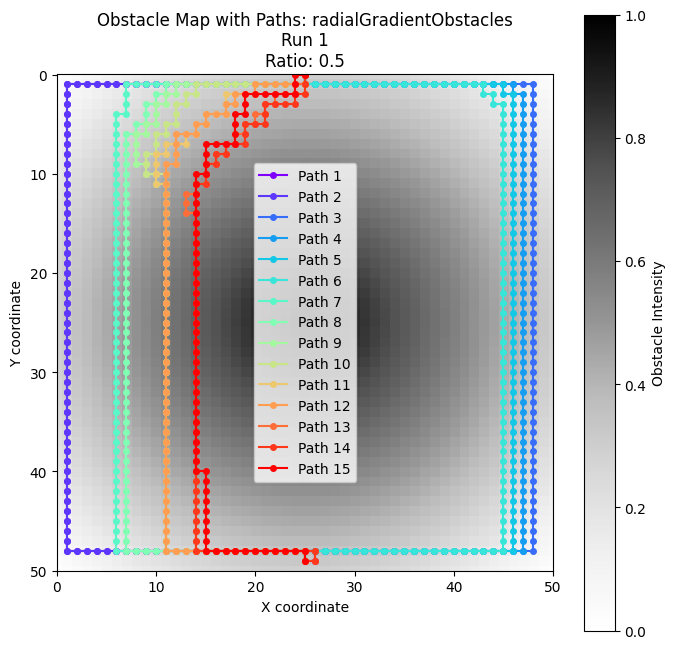

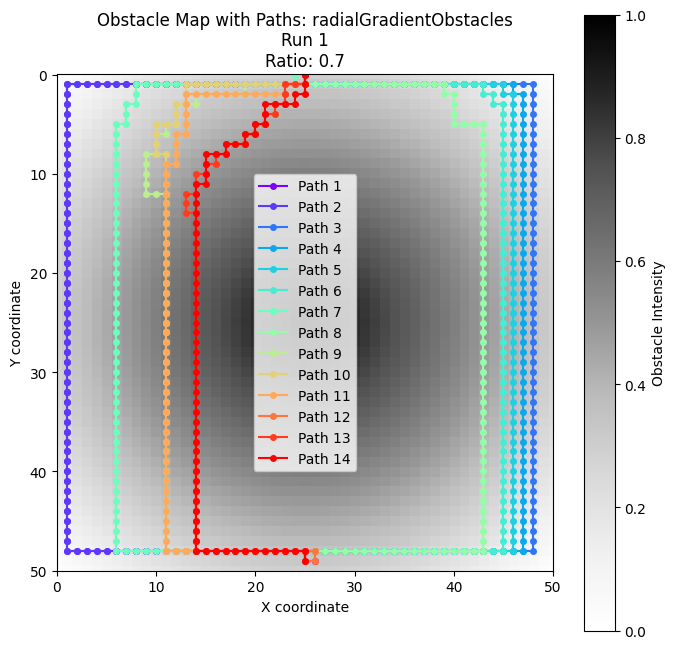

In [ ]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter

class ObstacleMapGenerator:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def create_meandering_river_obstacles(self):
        # Initialize the obstacle map
        obstacles = np.zeros((self.height, self.width))

        # Parameters for the river path
        river_width = 7
        t = np.linspace(0, 1, self.height)
        x_center = self.width / 2
        amplitude = self.width / 3

        # Generate smooth S-shaped path
        x_path = x_center + amplitude * np.sin(2 * np.pi * t)

        # Mark the river path on the obstacle map
        for y, x in enumerate(x_path):
            x_start = int(x - river_width / 2)
            x_end = int(x + river_width / 2)
            obstacles[y, max(x_start, 0):min(x_end, self.width)] = 1

        # Apply Gaussian filter to create gradient effect
        obstacles = gaussian_filter(obstacles, sigma=3)

        # Invert colors: black parts white and white parts black
        obstacles = 1 - obstacles

        # Normalize to 0-1 range
        obstacles = (obstacles - np.min(obstacles)) / (np.max(obstacles) - np.min(obstacles))

        return obstacles

    def create_radial_gradient_obstacles(self):
        # Center of the grid
        center_x, center_y = self.width // 2, self.height // 2

        # Create a distance matrix from the center
        x = np.arange(self.width)
        y = np.arange(self.height)
        xx, yy = np.meshgrid(x, y)
        distances = np.sqrt((xx - center_x)**2 + (yy - center_y)**2)

        # Normalize distances to range [0, 1]
        normalized_distances = distances / np.max(distances)

        # Invert the distances to create a gradient from center to edges
        radial_gradient = 1 - normalized_distances

        return radial_gradient

    def create_sinusoidal_obstacles(self):
        # x*pi -> with that x, the number of peaks and valleys can be altered
        x = np.linspace(0, 5 * np.pi, self.width)
        y = np.linspace(0, 5 * np.pi, self.height)
        x, y = np.meshgrid(x, y)
        # combining sine and cosine functions
        sinusoidal_obstacles = np.sin(x) * np.cos(y)
        # Normalize to 0-1 range
        sinusoidal_obstacles = (sinusoidal_obstacles - sinusoidal_obstacles.min()) / (sinusoidal_obstacles.max() - sinusoidal_obstacles.min())
        return sinusoidal_obstacles

    def create_gradient_obstacles(self):
        gradient = np.zeros((self.height, self.width))

        for i in range(self.height):
            for j in range(self.width):
                # Calculate the distance to the middle diagonal
                distance_to_diagonal = abs(i - j)
                max_distance = max(self.height, self.width) - 1
                normalized_distance = distance_to_diagonal / max_distance
                # The farther from the diagonal, the higher the value, reversed
                gradient[i, j] = 0.5 * (1 - normalized_distance)
                
                # Adjust for bottom right corner
                if i > j:
                    gradient[i, j] = 1 - gradient[i, j]
                else:
                    gradient[i, j] = gradient[i, j]
        
        return gradient

    def plot_obstacles_and_paths(self, map_name, paths, run_index, ratio):
        # Create the obstacle map based on the specified name
        if map_name == "meanderingRiverObstacles":
            obstacle_map = self.create_meandering_river_obstacles()
        elif map_name == "radialGradientObstacles":
            obstacle_map = self.create_radial_gradient_obstacles()
        elif map_name == "sinusoidalObstacles":
            obstacle_map = self.create_sinusoidal_obstacles()
        elif map_name == "gradientObstacles":
            obstacle_map = self.create_gradient_obstacles()
        else:
            raise ValueError(f"Unknown map name: {map_name}")

        ratios = [0.3, 0.5, 0.7]
        # Plot the obstacle map in greyscale
        plt.figure(figsize=(10, 10))
        plt.imshow(obstacle_map, cmap='Greys', interpolation='nearest')

        # Generate a colormap with a unique color for each path
        colors = cm.rainbow(np.linspace(0, 1, len(paths)))

        # Overlay the paths
        for i, path in enumerate(paths):
            if path:
                x_coords, y_coords = zip(*path)
                plt.plot(y_coords, x_coords, marker='o', markersize=4, color=colors[i], label=f'Path {i+1}')

        plt.xlim(0, self.width-1)
        plt.ylim(0, self.height-1)
        plt.gca().invert_yaxis()  # Invert y-axis to match typical grid orientation
        plt.title(f'Obstacle Map with Paths: {map_name}\nRun {run_index}\nRatio: {ratios[ratio]}')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.colorbar(label='Obstacle Intensity')
        plt.grid(False)
        plt.legend()
        plt.show()
        plt.close()



all_maps = [sin_sorted_both, meandering_sorted_both, radial_sorted_both]
maps_names = ["sinusoidalObstacles", "meanderingRiverObstacles", "radialGradientObstacles"]
for map_index, map in enumerate(all_maps):
    for run_index, run in enumerate(map):
        for ratio_index, ratio in enumerate(run):
            weights = []
            steps = []
            paths = []
            for dir in ratio:
                #print(dir)
                weights += list(dir["Shifted_Weight"])
                steps += list(dir["Steps"])
                paths += list(dir["Paths"])
            
            pareto_weights, pareto_steps, pareto_paths = pareto_from_lists(weights, steps, paths)  
            

            # Initialize obstacle map generator
            generator = ObstacleMapGenerator(width=51, height=51)
                            
            # Plot obstacle map and paths
            generator.plot_obstacles_and_paths(maps_names[map_index], pareto_paths, run_index, ratio_index)
